# Aim 1: Mismatch Compression
## Multimodal Recordings: Research-Grade DAQ

In this notebook we'll take a look at the three different modalities of neural recordings using in my dissertation.


## Setup

In [85]:
import matplotlib.pyplot as plt
from numpy               import arange
import scipy.signal as sig
import numpy as np

import seaborn as sns
sns.set_style("white")
sns.set_context("poster")

import sys
sys.path.append('/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/or_reset/brPY/')
from brPY.brpylib             import NsxFile, brpylib_ver
plt.rcParams['image.cmap'] = 'jet'

In [101]:
def blackrock_plot(pt='905',zoom=False,subtr_baseline=False,domain='TF'):
    if pt == '905':
        datafile = '/home/virati/MDD_Data/OR/DBS905/20150831-164204-002.ns2'
        start_t = 500
        elec_ids     = 'all'  # 'all' is default for all (1-indexed)
        start_time_s = start_t                       # 0 is default for all
        data_time_s  = 500                    # 'all' is default for all
        downsample   = 2                       # 1 is default
        plotch = 30

    elif pt == '906':
        datafile = '/home/virati/MDD_Data/OR/DBS906/20150727-174713/20150727-174713-001.ns2'
        start_t = 0
        elec_ids     = 'all'  # 'all' is default for all (1-indexed)
        start_time_s = start_t                       # 0 is default for all
        data_time_s  = 500                    # 'all' is default for all
        downsample   = 2                       # 1 is default
        plotch = 30
        
    nsx_file = NsxFile(datafile)

    # Extract data - note: data will be returned based on *SORTED* elec_ids, see cont_data['elec_ids']
    cont_data = nsx_file.getdata(elec_ids, start_time_s, data_time_s, downsample)

    #plt.plot(cont_data['data'][ch_idx,:])
    fs = cont_data['samp_per_s']
    print(fs)
    if subtr_baseline:
        sig_in = cont_data['data'][plotch,:] - cont_data['data'][0,:]
    
    else:
        sig_in = cont_data['data'][plotch,:]
    
    sig_in = sig.decimate(sig_in,1) #Just to use a clean antialiasing filter
    
    if domain == 'TF':
        if zoom:
            F,T,SG = sig.spectrogram(sig_in,fs = fs,nperseg=1024,noverlap=1000,nfft=2**11,window=sig.get_window('blackmanharris',1024))

        else:
            F,T,SG = sig.spectrogram(sig_in,fs = fs,nperseg=1024,noverlap=1000,nfft=2**11,window=sig.get_window('blackmanharris',1024))

        plt.figure(figsize=(30,15))
        plt.pcolormesh(T,F,10*np.log10(SG))
        plt.hlines(130,1,200,linewidth=10,color='r',linestyle='dotted')
        if zoom: plt.ylim((0,80))
        plt.xlabel('Time (sec)')
        plt.ylabel('Frequency (Hz)')
        sns.despine(left=True)
    else:
        fig, ax = plt.subplots(figsize=(30,15))
        ax.plot(sig_in)

        # inset axes....
        axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
        axins.plot(sig_in)

        # sub region of the original image
        x1, x2, y1, y2 = 50000, 50500, -3000, 3000
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.set_xticklabels('')
        axins.set_yticklabels('')

        ax.indicate_inset_zoom(axins)
        
        sns.despine(left=True)
    #%%
    # Close the nsx file now that all data is out
    nsx_file.close()
    

In [51]:
#datafile = '/home/virati/MDD_Data/OR/DBS906/20150727-174713/20150727-174713-001.ns2'
#datafile = '/home/virati/MDD_Data/OR/DBS906/20150727-181004/20150727-181004-001.ns2'


## Research-grade
The best recordings we have are from the Intraoperative-BlackRock DAQ.


### DBS905 - 08/2015


20150831-164204-002.ns2 opened
500.0

20150831-164204-002.ns2 closed


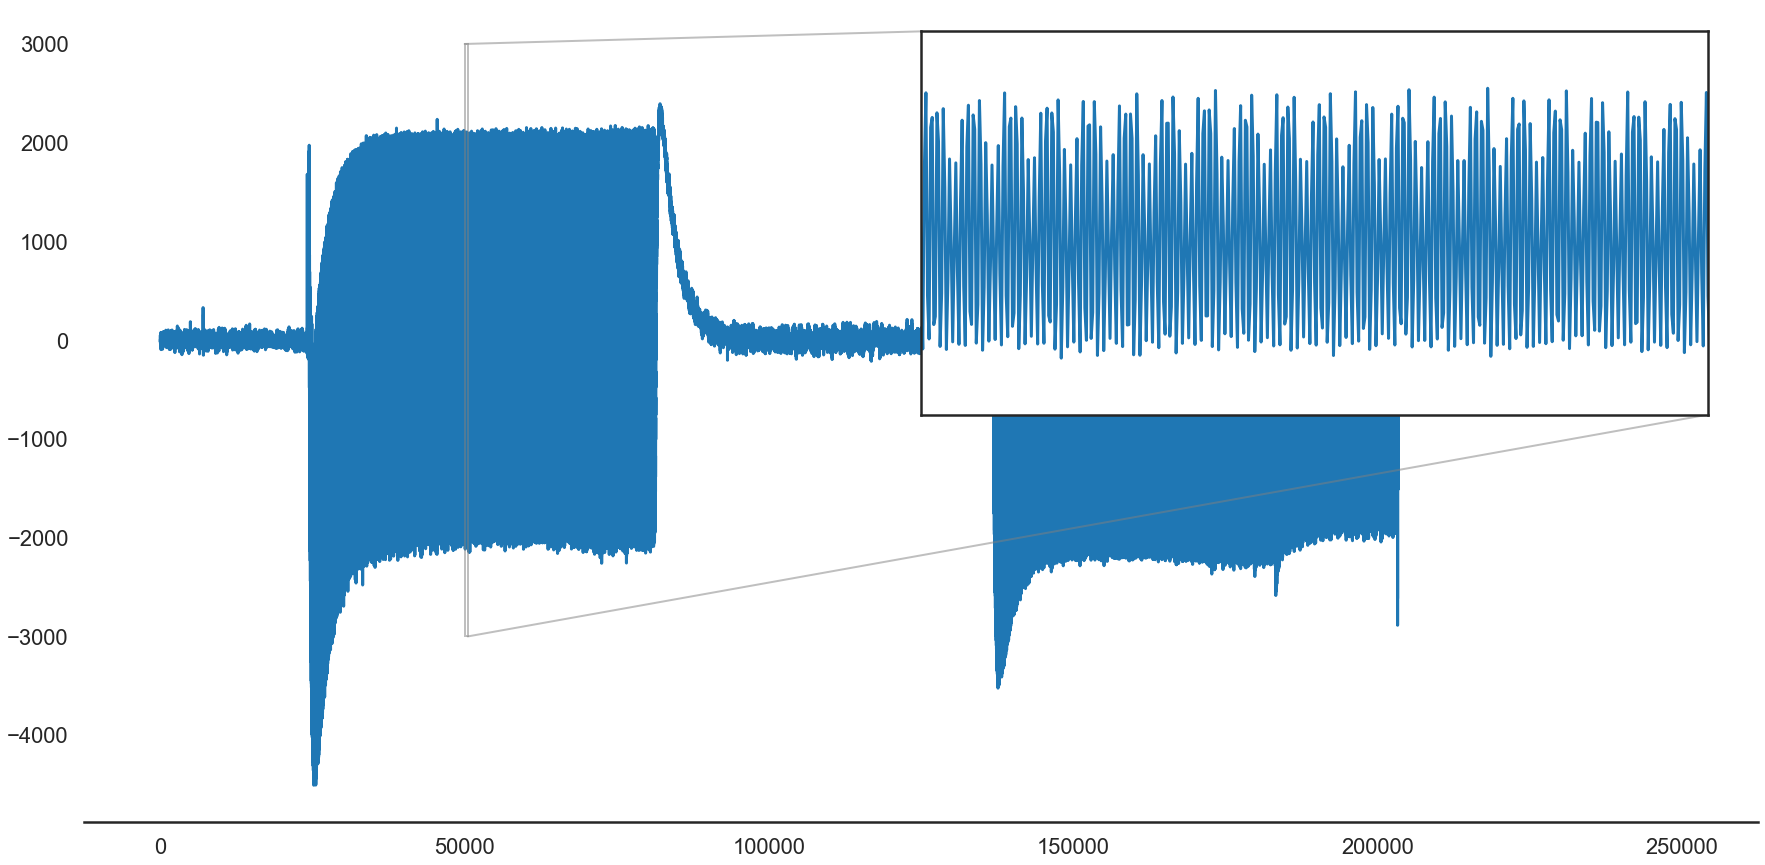

In [102]:
blackrock_plot(pt='905',zoom=False,subtr_baseline=True,domain='T')


20150831-164204-002.ns2 opened
500.0


/home/virati/.local/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



20150831-164204-002.ns2 closed


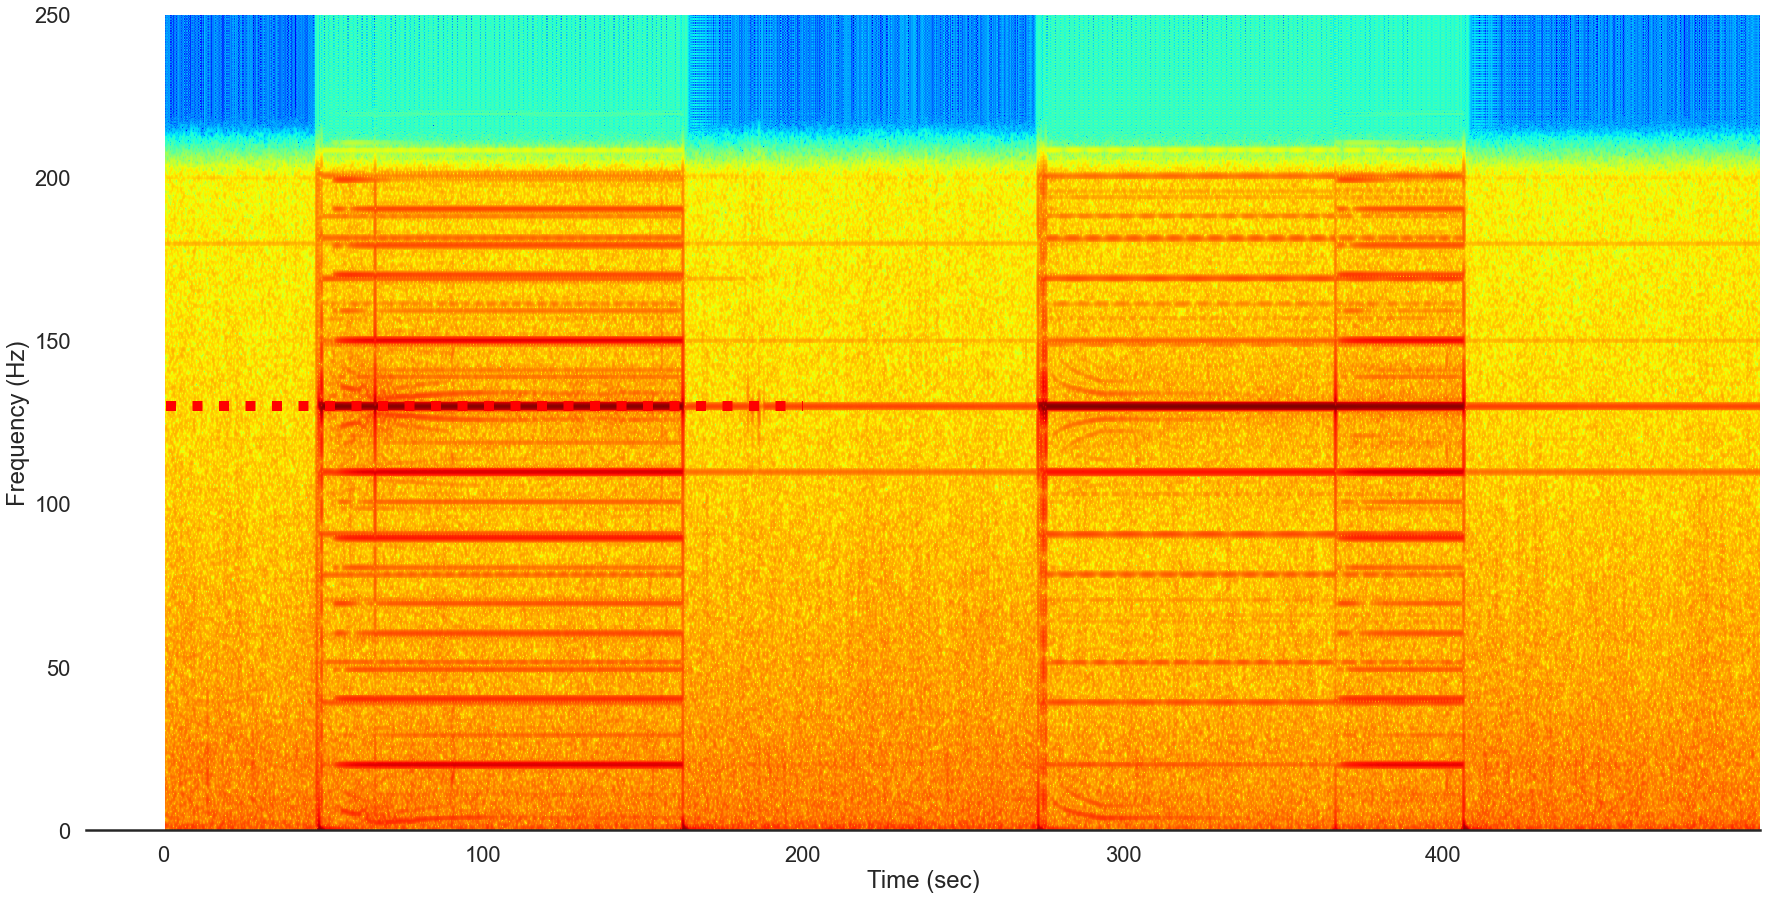

In [98]:
blackrock_plot(pt='905',zoom=False,subtr_baseline=True)

Looking at the time-domain, the periods with active stimulation are very obvious.
At first glance you may lose hope; how could we ever see what the brain is doing since the stim is doing so much?

Lucky for us, there aren't over signs that we're saturating.
While gain compression appears to be present, the broad slope flattening we expect from gain compression is not very present (See XLTek).

### DBS906 - 07/2015


20150727-174713-001.ns2 opened


/home/virati/.local/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



20150727-174713-001.ns2 closed


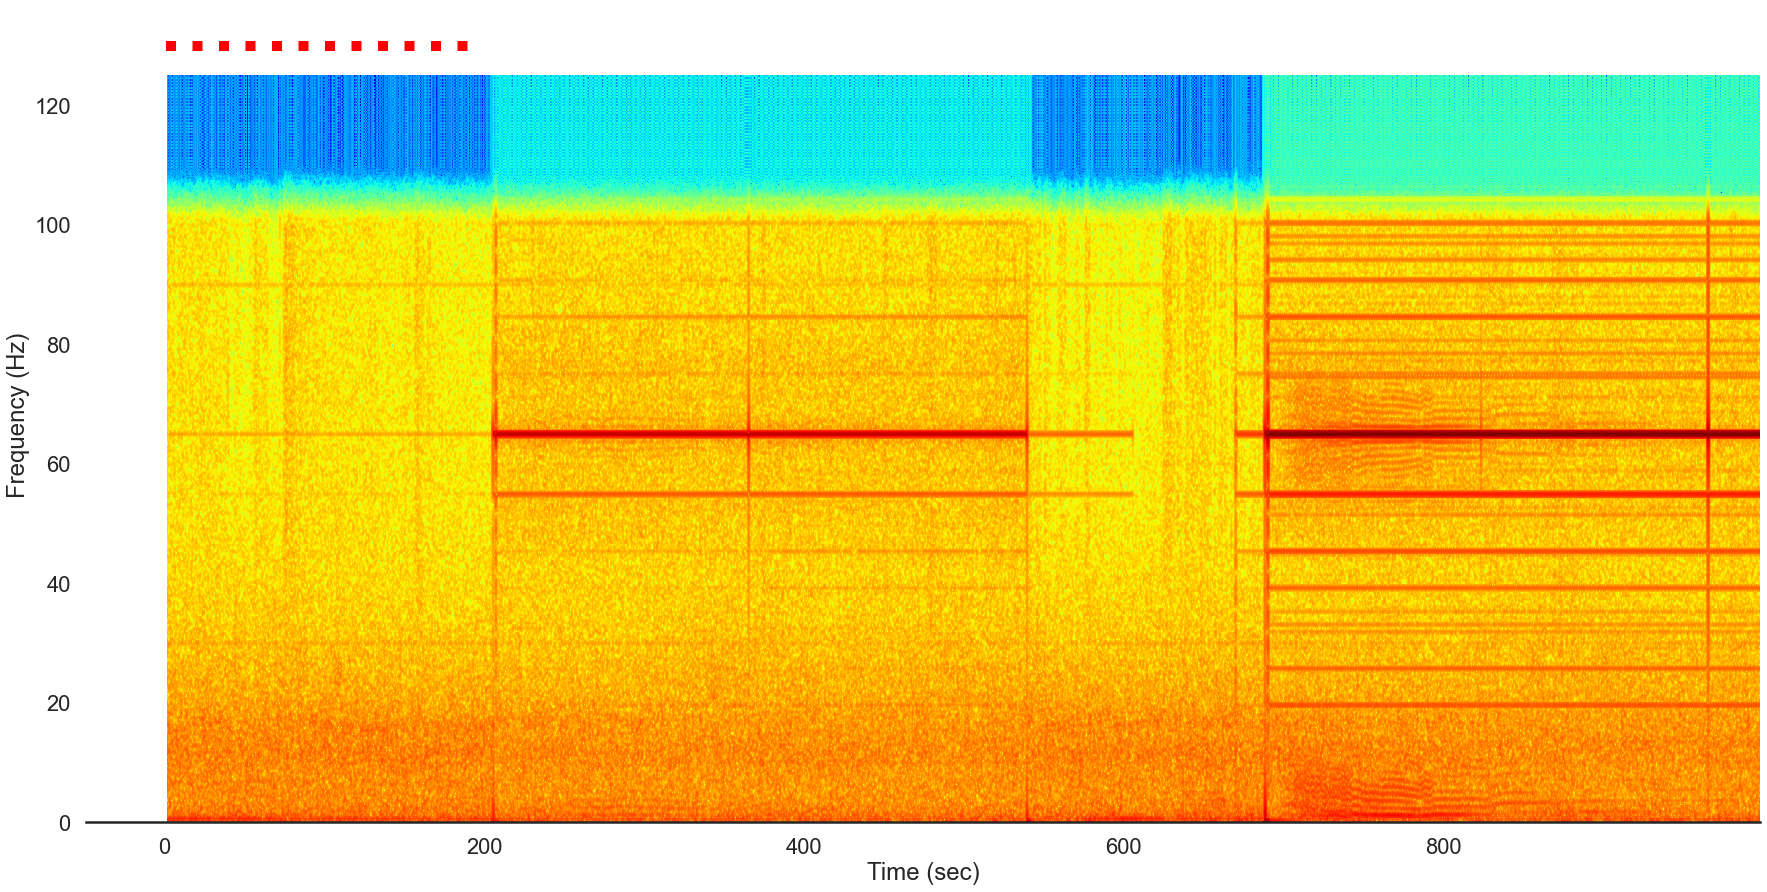

In [90]:
blackrock_plot(pt='906',zoom=False,subtr_baseline=True)